In [1]:
import pandas as pd
import numpy as np

In [2]:
test_df = pd.read_csv('test_set_features.csv', index_col='respondent_id')
training_df = pd.read_csv('training_set_features.csv', index_col='respondent_id')
training_labels = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [3]:
df = pd.concat([training_labels, training_df], axis=1)
df.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

In [4]:
len(df)

26707

In [5]:
numeric_col = training_df.columns[training_df.dtypes != 'object'].values
cat_col = training_df.columns[training_df.dtypes == 'object'].values

df[cat_col] = df[cat_col].fillna('None')

In [6]:
df.employment_status.value_counts()

Employed              13560
Not in Labor Force    10231
None                   1463
Unemployed             1453
Name: employment_status, dtype: int64

In [7]:
not_in_labor = df.loc[df['employment_status'].str.contains('Not in Labor Force')]
unemployed = df.loc[df['employment_status'].str.contains('Unemployed')]
none = df.loc[df['employment_status'].str.contains('None')]

no_job = pd.concat([not_in_labor, unemployed, none])
len(no_job)

13147

In [8]:
mask = no_job.index
df.loc[mask, 'employment_industry'] = 'Not working'
df.loc[mask, 'employment_occupation'] = 'No Job Title'

mask2 = no_job.loc[no_job['health_worker'].isna()].index
df.loc[mask2, 'health_worker'] = 0

In [9]:
mask2

Int64Index([ 2278,  6464, 11125, 14738, 22227, 25623,    64,   105,   175,
              183,
            ...
            26274, 26298, 26327, 26389, 26401, 26510, 26526, 26549, 26608,
            26672],
           dtype='int64', name='respondent_id', length=796)

In [10]:
no_job.loc[no_job['health_worker'].isna()].index

Int64Index([ 2278,  6464, 11125, 14738, 22227, 25623,    64,   105,   175,
              183,
            ...
            26274, 26298, 26327, 26389, 26401, 26510, 26526, 26549, 26608,
            26672],
           dtype='int64', name='respondent_id', length=796)

In [11]:
df.health_worker.value_counts()

0.0    23800
1.0     2899
Name: health_worker, dtype: int64

In [12]:
df.employment_industry.value_counts()

Not working    13147
fcxhlnwr        2468
wxleyezf        1804
ldnlellj        1231
pxcmvdjn        1037
atmlpfrs         926
arjwrbjb         871
xicduogh         851
mfikgejo         614
vjjrobsf         527
rucpziij         523
xqicxuve         511
saaquncn         338
cfqqtusy         325
nduyfdeo         286
mcubkhph         275
wlfvacwt         215
dotnnunm         201
None             183
haxffmxo         148
msuufmds         124
phxvnwax          89
qnlwzans          13
Name: employment_industry, dtype: int64

In [13]:
df.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                      8
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                          0
race                               0
sex                                0
i

In [14]:
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = training_labels['h1n1_vaccine']
y_seasonal = training_labels['seasonal_vaccine']

In [156]:
X_h1n1 = df.drop(['h1n1_vaccine', 'seasonal_vaccine', 'behavioral_large_gatherings', 'behavioral_outside_home', 'opinion_seas_sick_from_vacc', 'sex', 'census_msa', 'household_children'], axis=1)
X_seasonal = df.drop(['h1n1_vaccine', 'seasonal_vaccine', 'behavioral_antiviral_meds', 'child_under_6_months', 'opinion_h1n1_sick_from_vacc', 'census_msa'], axis=1)

In [168]:
num_col_h1n1 = X_h1n1.columns[X_h1n1.dtypes != 'object'].values
cat_col_h1n1 = X_h1n1.columns[X_h1n1.dtypes == 'object'].values

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [198]:
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X_h1n1, training_labels['h1n1_vaccine'], test_size=0.33, random_state=42, stratify=training_labels['h1n1_vaccine'])

In [199]:
imputer.fit(X_train_h1n1[num_col_h1n1])

X_train_h1n1_filled = pd.DataFrame(imputer.transform(X_train_h1n1[num_col_h1n1]),
                                       index=X_train_h1n1[num_col_h1n1].index,
                                       columns=X_train_h1n1[num_col_h1n1].columns)
X_test_h1n1_filled = pd.DataFrame(imputer.transform(X_test_h1n1[num_col_h1n1]),
                                      index=X_test_h1n1[num_col_h1n1].index,
                                      columns=X_test_h1n1[num_col_h1n1].columns)

In [200]:
std.fit(X_train_h1n1_filled)

X_train_h1n1_scaled = pd.DataFrame(std.transform(X_train_h1n1_filled),
                                       index=X_train_h1n1_filled.index,
                                       columns=X_train_h1n1_filled.columns)
X_test_h1n1_scaled = pd.DataFrame(std.transform(X_test_h1n1_filled),
                                      index=X_test_h1n1_filled.index,
                                      columns=X_test_h1n1_filled.columns)

In [201]:
ohe.fit(X_train_h1n1[cat_col_h1n1])

X_train_h1n1_ohe = pd.DataFrame(ohe.transform(X_train_h1n1[cat_col_h1n1]),
                                index=X_train_h1n1[cat_col_h1n1].index,
                                columns=np.hstack(ohe.categories_))
X_test_h1n1_ohe = pd.DataFrame(ohe.transform(X_test_h1n1[cat_col_h1n1]),
                                index=X_test_h1n1[cat_col_h1n1].index,
                                columns=np.hstack(ohe.categories_))

In [202]:
X_train_h1n1_processed = pd.concat([X_train_h1n1_scaled, X_train_h1n1_ohe], axis=1)
X_test_h1n1_processed = pd.concat([X_test_h1n1_scaled, X_test_h1n1_ohe], axis=1)

In [203]:
log_loss_cv = cross_val_score(log_model, X_train_h1n1_processed, y_train_h1n1, scoring='neg_log_loss')

log_loss_h1n1 = -(log_loss_cv.mean())
log_loss_h1n1

0.38402786064032296

In [204]:
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_seasonal, training_labels['seasonal_vaccine'], test_size=0.33, random_state=42, stratify=training_labels['seasonal_vaccine'])

In [205]:
num_col_seasonal = X_seasonal.columns[X_seasonal.dtypes != 'object'].values
cat_col_seasonal = X_seasonal.columns[X_seasonal.dtypes == 'object'].values

In [206]:
imputer.fit(X_train_seasonal[num_col_seasonal])

X_train_seasonal_filled = pd.DataFrame(imputer.transform(X_train_seasonal[num_col_seasonal]),
                                       index=X_train_seasonal[num_col_seasonal].index,
                                       columns=X_train_seasonal[num_col_seasonal].columns)
X_test_seasonal_filled = pd.DataFrame(imputer.transform(X_test_seasonal[num_col_seasonal]),
                                      index=X_test_seasonal[num_col_seasonal].index,
                                      columns=X_test_seasonal[num_col_seasonal].columns)
std.fit(X_train_seasonal_filled)

X_train_seasonal_scaled = pd.DataFrame(std.transform(X_train_seasonal_filled),
                                       index=X_train_seasonal_filled.index,
                                       columns=X_train_seasonal_filled.columns)
X_test_seasonal_scaled = pd.DataFrame(std.transform(X_test_seasonal_filled),
                                      index=X_test_seasonal_filled.index,
                                      columns=X_test_seasonal_filled.columns)
ohe.fit(X_train_seasonal[cat_col_seasonal])

X_train_seasonal_ohe = pd.DataFrame(ohe.transform(X_train_seasonal[cat_col_seasonal]),
                                index=X_train_seasonal[cat_col_seasonal].index,
                                columns=np.hstack(ohe.categories_))
X_test_seasonal_ohe = pd.DataFrame(ohe.transform(X_test_seasonal[cat_col_seasonal]),
                                index=X_test_seasonal[cat_col_seasonal].index,
                                columns=np.hstack(ohe.categories_))

X_train_seasonal_processed = pd.concat([X_train_seasonal_scaled, X_train_seasonal_ohe], axis=1)
X_test_seasonal_processed = pd.concat([X_test_seasonal_scaled, X_test_seasonal_ohe], axis=1)

log_loss_cv = cross_val_score(log_model, X_train_seasonal_processed, y_train_seasonal, scoring='neg_log_loss')

log_loss_seasonal = -(log_loss_cv.mean())
log_loss_seasonal

0.47763295920394455

___
# Stratified

In [207]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import log_loss

neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

def custom_cross_val_score(estimator, X, y):
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)
    
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        scaler = StandardScaler()
        X_t_scaled = scaler.fit_transform(X_t)
        X_val_scaled = scaler.transform(X_val)
        
        sm = SMOTE(random_state=42, sampling_strategy=0.3, k_neighbors=3)
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
    
    return kfold_train_scores, kfold_val_scores

___

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, training_labels, test_size=0.33, random_state=42, stratify=training_labels)

In [110]:
imputer = SimpleImputer(strategy='median')

X_train_num = X_train[numeric_col]
X_test_num = X_test[numeric_col]

imputer.fit(X_train_num)

X_train_filled = pd.DataFrame(imputer.transform(X_train_num),
                                       index=X_train_num.index,
                                       columns=X_train_num.columns)
X_test_filled = pd.DataFrame(imputer.transform(X_test_num),
                                      index=X_test_num.index,
                                      columns=X_test_num.columns)

In [111]:
std = StandardScaler()
std.fit(X_train_filled)

X_train_scaled = pd.DataFrame(std.transform(X_train_filled),
                                       index=X_train_filled.index,
                                       columns=X_train_filled.columns)
X_test_scaled = pd.DataFrame(std.transform(X_test_filled),
                                      index=X_test_filled.index,
                                      columns=X_test_filled.columns)

In [179]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[cat_col])

X_train_ohe = pd.DataFrame(ohe.transform(X_train[cat_col]),
                                index=X_train[cat_col].index,
                                columns=np.hstack(ohe.categories_))
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_col]),
                                index=X_test[cat_col].index,
                                columns=np.hstack(ohe.categories_))

In [113]:
X_train_processed = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_processed = pd.concat([X_test_scaled, X_test_ohe], axis=1)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression(solver='liblinear', fit_intercept=False, C=1e12, random_state=42, max_iter=150)
log_loss_cv = cross_val_score(log_model, X_train_processed, y_train['h1n1_vaccine'], scoring='neg_log_loss')

log_loss_h1n1 = -(log_loss_cv.mean())
log_loss_h1n1

0.38462186059984715

In [115]:
log_loss_cv = cross_val_score(log_model, X_train_processed, y_train['seasonal_vaccine'], scoring='neg_log_loss')

log_loss_seasonal = -(log_loss_cv.mean())
log_loss_seasonal

0.48150400056497344

___
# StratifiedKFold & SMOTE

In [331]:
kfold_train_scores = np.ndarray(5)
kfold_val_scores = np.ndarray(5)
    
kfold = StratifiedKFold(n_splits=5)

for fold, (train_index, val_index) in enumerate(kfold.split(X_train_h1n1, y_train_h1n1)):
        
        num = X_train_h1n1.columns[X_train_h1n1.dtypes != 'object'].values
        cat = X_train_h1n1.columns[X_train_h1n1.dtypes == 'object'].values
        
        X_t, X_val = X_train_h1n1.iloc[train_index], X_train_h1n1.iloc[val_index]
        y_t, y_val = y_train_h1n1.iloc[train_index], y_train_h1n1.iloc[val_index]
        
        imputer = SimpleImputer(strategy='median')
        X_t_imputed = imputer.fit_transform(X_t[num])
        X_val_imputed = imputer.transform(X_val[num])
        
        scaler = StandardScaler()
        X_t_scaled = scaler.fit_transform(X_t_imputed)
        X_val_scaled = scaler.fit_transform(X_val_imputed)
        
        X_t_scaled_df = pd.DataFrame(X_t_scaled, index=X_t.index, columns=num)
        X_val_scaled_df = pd.DataFrame(X_val_scaled, index=X_val.index, columns=num)
        
        X_t_dum = pd.get_dummies(X_t[cat])
        X_val_dum = pd.get_dummies(X_val[cat])
        
        X_t_final = pd.concat([X_t_scaled_df, X_t_dum], axis=1)
        X_val_final = pd.concat([X_val_scaled_df, X_val_dum], axis=1)
        #ohe = OneHotEncoder()
        #X_t_ohe = ohe.fit_transform(X_t[cat])
        #X_val_ohe = ohe.transform(X_val[cat])
        #print(X_t_ohe.shape)
        
        #X_t_final = np.concatenate([X_t_scaled, X_t_ohe], axis=1)
        #print(X_t_final.shape)
        
        sm = SMOTE(random_state=42, sampling_strategy=0.28)
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_final, y_t)
        
        temp_model = clone(LogisticRegression(random_state=42, class_weight={1: 0.28}, max_iter=150))
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_final, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        print(kfold_train_scores, kfold_val_scores)

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[-4.54032691e-001  9.88131292e-323  1.03753786e-322  1.08694442e-322
  1.13635099e-322] [-0.47731735 -0.4596319  -0.461035   -0.45829006 -0.45765438]


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[-4.54032691e-001 -4.59637835e-001  1.03753786e-322  1.08694442e-322
  1.13635099e-322] [-0.47731735 -0.46168069 -0.461035   -0.45829006 -0.45765438]


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[-4.54032691e-001 -4.59637835e-001 -4.61320216e-001  1.08694442e-322
  1.13635099e-322] [-0.47731735 -0.46168069 -0.44666721 -0.45829006 -0.45765438]


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[-4.54032691e-001 -4.59637835e-001 -4.61320216e-001 -4.58248331e-001
  1.13635099e-322] [-0.47731735 -0.46168069 -0.44666721 -0.46823067 -0.45765438]
[-0.45403269 -0.45963784 -0.46132022 -0.45824833 -0.4576695 ] [-0.47731735 -0.46168069 -0.44666721 -0.46823067 -0.46101338]


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [332]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import log_loss

def custom_cross_val_score(estimator, X, y):
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)
    
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        
        num = X.columns[X.dtypes != 'object'].values
        cat = X.columns[X.dtypes == 'object'].values
        
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        imputer = SimpleImputer(strategy='median')
        X_t_imputed = imputer.fit_transform(X_t[num])
        X_val_imputed = imputer.transform(X_val[num])
        
        scaler = StandardScaler()
        X_t_scaled = scaler.fit_transform(X_t_imputed)
        X_val_scaled = scaler.fit_transform(X_val_imputed)
        
        X_t_scaled_df = pd.DataFrame(X_t_scaled, index=X_t.index, columns=num)
        X_val_scaled_df = pd.DataFrame(X_val_scaled, index=X_val.index, columns=num)
        
        X_t_dum = pd.get_dummies(X_t[cat])
        X_val_dum = pd.get_dummies(X_val[cat])
        
        X_t_final = pd.concat([X_t_scaled_df, X_t_dum], axis=1)
        X_val_final = pd.concat([X_val_scaled_df, X_val_dum], axis=1)
        
        sm = SMOTE(random_state=42, sampling_strategy=0.28)
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_final, y_t)
        
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_final, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
    
    return kfold_train_scores, kfold_val_scores

In [335]:
model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.28}, max_iter=250)
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train_h1n1, y_train_h1n1)
-(preprocessed_neg_log_loss_cv.mean())

0.4629813642199833

In [336]:
decimals = np.arange(0.1, 0.9, 0.1)
log_loss_mean = []

In [341]:
%%time

for num in decimals:
    model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1:num}, max_iter=250)
    preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train_h1n1, y_train_h1n1)
    log_loss_mean.append(-(preprocessed_neg_log_loss_cv.mean()))
log_loss_mean

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Wall time: 30.9 s


C:\Users\joshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.61004503570525,
 0.5050585315148346,
 0.45528027099167956,
 0.4267166127973134,
 0.4090675986188727,
 0.3977060683086292,
 0.3906330697657822,
 0.6100457337377414,
 0.5050621848939564,
 0.45523807826273666,
 0.4265965262475575,
 0.4088575218334614,
 0.3976171875995086,
 0.39058245911117984,
 0.3864551765369251]

___
# Changing test set

In [119]:
test_df[cat_col] = test_df[cat_col].fillna('None')

In [120]:
test_not_in_labor = test_df.loc[test_df['employment_status'].str.contains('Not in Labor Force')]
test_unemployed = test_df.loc[test_df['employment_status'].str.contains('Unemployed')]
test_none = test_df.loc[test_df['employment_status'].str.contains('None')]

test_no_job = pd.concat([test_not_in_labor, test_unemployed, test_none])
len(test_no_job)

13076

In [121]:
test_mask = test_no_job.index
test_df.loc[test_mask, 'employment_industry'] = 'Not working'
test_df.loc[test_mask, 'employment_occupation'] = 'No Job Title'

test_mask2 = test_no_job.loc[test_no_job['health_worker'].isna()].index
test_df.loc[test_mask2, 'health_worker'] = 0

In [122]:
X_test_set_num = test_df[numeric_col]
X_test_set_cat = test_df[cat_col]
num_col_h1n1 = X_h1n1.columns[X_h1n1.dtypes != 'object'].values

In [355]:
imputer.fit(X_test_set_processed_h1n1[num_col_h1n1])

X_test_set_filled_num = pd.DataFrame(imputer.transform(X_test_set_processed_h1n1[num_col_h1n1]),
                                       index=X_test_set_processed_h1n1[num_col_h1n1].index,
                                       columns=X_test_set_processed_h1n1[num_col_h1n1].columns)

std.fit(X_test_set_filled_num)
X_test_set_scaled = pd.DataFrame(std.transform(X_test_set_filled_num),
                                       index=X_test_set_filled_num.index,
                                       columns=X_test_set_filled_num.columns)

In [373]:
ohe_test = OneHotEncoder(handle_unknown='error', sparse=False)
test_feat = ohe_test.fit_transform(test_df[cat_col_h1n1])

X_test_set_ohe = pd.DataFrame(test_feat,
                                index=test_df[cat_col_h1n1].index,
                                columns=np.hstack(ohe_test.categories_))

In [353]:
X_test_set_processed_h1n1 = test_df.drop(['behavioral_large_gatherings',
                  'behavioral_outside_home',
                  'opinion_seas_sick_from_vacc',
                  'sex',
                  'census_msa',
                  'household_children'], axis=1)

In [374]:
X_test_set_processed = pd.concat([X_test_set_scaled, X_test_set_ohe], axis=1)

In [378]:
X_test_set_processed_seasonal = test_df.drop([
                      'behavioral_antiviral_meds',
                      'child_under_6_months',
                      'opinion_h1n1_sick_from_vacc',
                      'census_msa'], axis=1)

imputer.fit(X_test_set_processed_seasonal[num_col_seasonal])

X_test_set_filled_num = pd.DataFrame(imputer.transform(X_test_set_processed_seasonal[num_col_seasonal]),
                                       index=X_test_set_processed_seasonal[num_col_seasonal].index,
                                       columns=X_test_set_processed_seasonal[num_col_seasonal].columns)

std.fit(X_test_set_filled_num)
X_test_set_scaled = pd.DataFrame(std.transform(X_test_set_filled_num),
                                       index=X_test_set_filled_num.index,
                                       columns=X_test_set_filled_num.columns)

ohe_test = OneHotEncoder(handle_unknown='error', sparse=False)
test_feat = ohe_test.fit_transform(test_df[cat_col_seasonal])

X_test_set_ohe = pd.DataFrame(test_feat,
                                index=test_df[cat_col_seasonal].index,
                                columns=np.hstack(ohe_test.categories_))
X_test_set_processed_seasonal = pd.concat([X_test_set_scaled, X_test_set_ohe], axis=1)

In [379]:
log_model.fit(X_train_h1n1_processed, y_train_h1n1)
y_hat_h1n1 = log_model.predict_proba(X_test_set_processed)

In [380]:
y_hat_h1n1

array([[0.90754844, 0.09245156],
       [0.96393886, 0.03606114],
       [0.50849532, 0.49150468],
       ...,
       [0.85689667, 0.14310333],
       [0.95072339, 0.04927661],
       [0.58224375, 0.41775625]])

In [381]:
log_model.fit(X_train_seasonal_processed, y_train_seasonal)
y_hat_seasonal = log_model.predict_proba(X_test_set_processed_seasonal)

In [382]:
submission_df = pd.read_csv('submission_format.csv', index_col='respondent_id')
submission_df['h1n1_vaccine'] = y_hat_h1n1[:, 1]
submission_df['seasonal_vaccine'] = y_hat_seasonal[:, 1]

In [383]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.092452,0.279199
26708,0.036061,0.049120
26709,0.491505,0.586962
26710,0.478546,0.868233
26711,0.150360,0.509737


___
# ROC and AUC

In [344]:
from sklearn.metrics import roc_curve, auc

model_log = log_model.fit(X_train_h1n1_processed, y_train_h1n1)

y_train_score = model_log.decision_function(X_train_h1n1_processed)
train_fpr, train_tpr, thresholds = roc_curve(y_train_h1n1, y_train_score)

y_score = model_log.decision_function(X_test_h1n1_processed)
fpr, tpr, thresholds = roc_curve(y_test_h1n1, y_score)

AUC: 0.8390275543366205


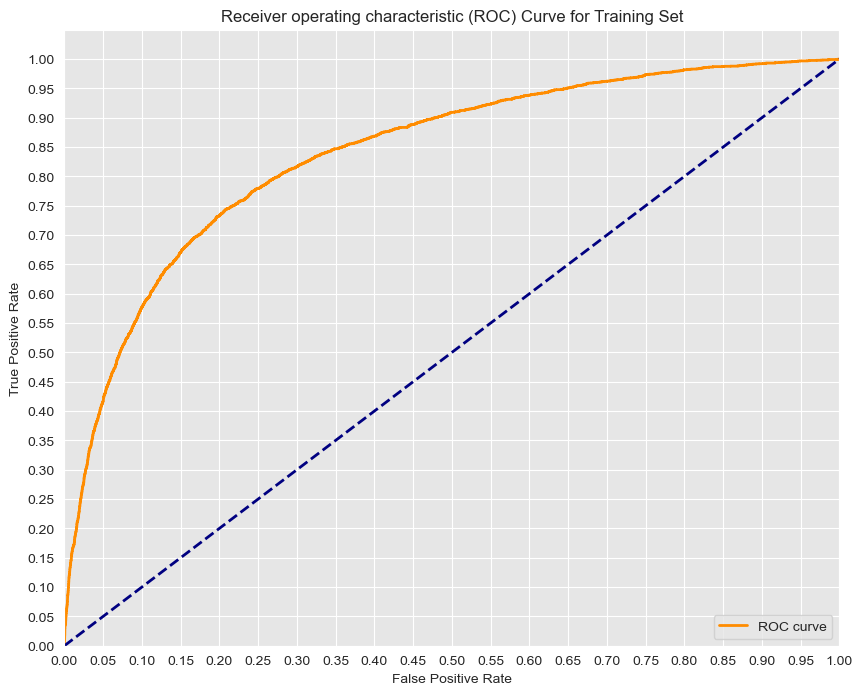

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 0.8292943967586459


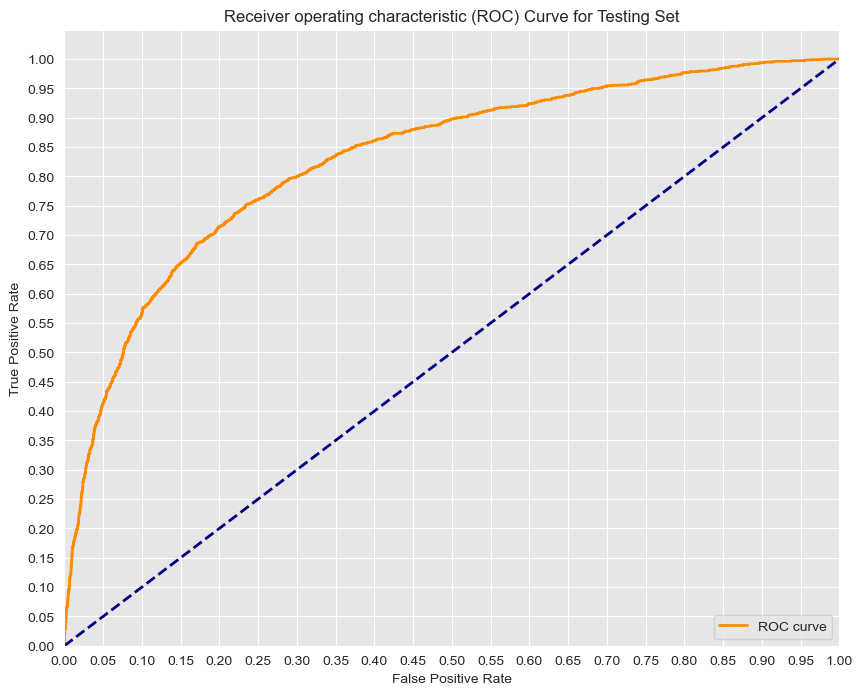

In [346]:
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

___
# KNN

In [142]:
clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(X_train_processed, y_train)

test_preds = clf.predict(X_test_processed)

knn_baseline_log_loss = cross_val_score(clf, X_train_processed, y_train['h1n1_vaccine'], scoring='neg_log_loss')

mean_knn_log_loss = -np.average(knn_baseline_log_loss)
mean_knn_log_loss

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.5011289013740121

In [135]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [136]:
print_metrics(y_test['h1n1_vaccine'], [item[0] for item in test_preds])

Precision Score: 0.616822429906542
Recall Score: 0.38782051282051283
Accuracy Score: 0.8188109825277967
F1 Score: 0.4762217120367333


In [137]:
print_metrics(y_test['seasonal_vaccine'], [item[1] for item in test_preds])

Precision Score: 0.7053116662624302
Recall Score: 0.7085769980506823
Accuracy Score: 0.7264579078738371
F1 Score: 0.7069405615655767


In [138]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [139]:
find_best_k(X_train_processed, y_train['h1n1_vaccine'], X_test_processed, y_test['h1n1_vaccine'])

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\joshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Value for k: 13
F1-Score: 0.48824714573539296


In [143]:
%%time
knn_baseline_model_p1 = KNeighborsClassifier(p=1)

knn_baseline_log_loss_p1 = cross_val_score(knn_baseline_model_p1, X_train_processed, y_train['h1n1_vaccine'], scoring='neg_log_loss')

mean_knn_log_loss_p1 = -np.average(knn_baseline_log_loss_p1)
mean_knn_log_loss_p1

Wall time: 1min 46s


1.9553887323341037

In [144]:
%%time
knn_baseline_model_p15 = KNeighborsClassifier(p=1.5)

knn_baseline_log_loss_p15 = cross_val_score(knn_baseline_model_p15, X_train_processed, y_train['h1n1_vaccine'], scoring='neg_log_loss')

mean_knn_log_loss_p15 = -np.average(knn_baseline_log_loss_p15)
mean_knn_log_loss_p15

Wall time: 8min 19s


1.981163416009387

___
# Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

In [150]:
regressor_log_loss = cross_val_score(regressor, X_train_processed, y_train, scoring='neg_log_loss')
mean_regressor_log_loss = -np.average(regressor_log_loss)
mean_regressor_log_loss

C:\Users\joshu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\joshu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'

  warnings.warn(
C:\Users\joshu\anacon

nan

In [99]:
X_test_processed

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun,"MSA, Not Principle City","MSA, Principle City",Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
15772,0.418027,-0.428481,-0.226446,0.613781,3.649297,0.462536,1.342892,1.40280,0.692409,-0.505533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9407,1.519314,-2.051490,-0.226446,0.613781,3.649297,0.462536,1.342892,1.40280,-1.444234,-0.505533,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16515,-0.683260,-0.428481,-0.226446,0.613781,-0.274025,0.462536,1.342892,1.40280,0.692409,-0.505533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23353,0.418027,1.194528,-0.226446,0.613781,-0.274025,0.462536,-0.744662,-0.71286,-1.444234,-0.505533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10008,-0.683260,1.194528,-0.226446,0.613781,-0.274025,0.462536,1.342892,-0.71286,0.692409,-0.505533,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25990,-1.784547,-0.428481,-0.226446,-1.629246,-0.274025,-2.161995,-0.744662,-0.71286,-1.444234,-0.505533,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
14302,0.418027,1.194528,-0.226446,0.613781,-0.274025,0.462536,-0.744662,-0.71286,0.692409,-0.505533,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3817,-0.683260,1.194528,-0.226446,0.613781,-0.274025,0.462536,-0.744662,-0.71286,-1.444234,1.978112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
y_test['h1n1_vaccine']

respondent_id
15772    0
9407     0
16515    0
23353    0
10008    0
        ..
25990    0
14302    0
3817     1
13912    0
16392    0
Name: h1n1_vaccine, Length: 6677, dtype: int64

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

def performance(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    return [r2, rmse]

In [95]:
score = performance(y_test['h1n1_vaccine'], y_hat_h1n1_tree)
score

[-0.4207869675934002, 0.4873723685953187]